In [186]:
import quantecon as qe
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib inline

# –¥–æ–∫—É–º–µ–Ω—Ç–∞—Ü–∏—è –¥–ª—è –¶–ú
# https://quanteconpy.readthedocs.io/en/stable/markov/core.html

# –û—Ü–µ–Ω–∫–∞ –º–∞—Ç—Ä–∏—Ü—ã –ø–µ—Ä–µ—Ö–æ–¥–Ω—ã—Ö –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç–µ–π

–î–∞–Ω–∞ –ø–æ—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å–Ω–æ—Å—Ç—å –Ω–∞–±–ª—é–¥–µ–Ω–∏–π

$X_1,X_2,‚Ä¶,X_N X_i \in E$.

–ö–∞–∫ –ø–æ–¥—Å—á–∏—Ç–∞—Ç—å –º–∞—Ç—Ä–∏—Ü—É –ø–µ—Ä–µ—Ö–æ–¥–Ω—ã—Ö –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç–µ–π $p_{ij}=P(X_{n+1}=j|X_n=i)$?

**–ó–∞–∫–æ–Ω –±–æ–ª—å—à–∏—Ö —á–∏—Å–µ–ª:**
–ß–∞—Å—Ç–æ—Ç–∞ –Ω–µ–∫–æ—Ç–æ—Ä–æ–≥–æ —Å–æ–±—ã—Ç–∏—è –≤ —Å–µ—Ä–∏–∏ –Ω–µ–∑–∞–≤–∏—Å–∏–º—ã—Ö –∏—Å–ø—ã—Ç–∞–Ω–∏–π –ø—Ä–∏–±–ª–∏–∂–∞–µ—Ç—Å—è (–∏ –æ—Å—Ç–∞–µ—Ç—Å—è –±–ª–∏–∑–∫–æ–π) –∫ –µ–≥–æ –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç–∏:

$\nu_n(A) \to P(A) (n \to \infty), \nu_n(A)= \dfrac{n_A}{n}$


$p_{ij}=P(X_{n+1}=j|X_n=i)\approx \dfrac{1}{N} \sum\limits_{n=1} I(X_{n+1}=j|X_n=i)$

In [71]:
P = ((0.971, 0.029, 0.000),
     (0.145, 0.778, 0.077),
     (0.000, 0.508, 0.492))

In [72]:
P = np.array(P)

In [73]:
P

array([[0.971, 0.029, 0.   ],
       [0.145, 0.778, 0.077],
       [0.   , 0.508, 0.492]])

In [74]:
mc1 = qe.MarkovChain(P)

In [75]:
# –ú–µ—Ç–æ–¥ –≥–µ–Ω–µ—Ä–∏—Ä—É–µ—Ç —Ü–µ–ø—å –ú–∞—Ä–∫–æ–≤–∞ –¥–ª–∏–Ω–æ–π 50 –∏ –ª—é–±—ã–º –Ω–∞—á–∞–ª—å–Ω—ã–º 
# —Å–æ—Å—Ç–æ—è–Ω–∏–µ–º 0
k=mc1.simulate(500000, init=0)

In [76]:
k

array([0, 0, 0, ..., 0, 1, 1])

In [77]:
def transition_matrix(transitions):
 n = 1+ max(transitions) #number of states

 M = [[0]*n for _ in range(n)]

 for (i,j) in zip(transitions,transitions[1:]):
  M[i][j] += 1

 #now convert to probabilities:
 for row in M:
  s = sum(row)
  if s > 0:
   row[:] = [f/s for f in row]
 return M

#test:

m = transition_matrix(k)
for row in m: print(' '.join('{0:.3f}'.format(x) for x in row))

0.971 0.029 0.000
0.147 0.778 0.075
0.000 0.504 0.496


In [128]:
print(P)

[[0.    0.    0.    0.5   0.    0.5   0.    0.    0.    0.    0.    0.
  0.    0.   ]
 [0.    0.    0.    0.    0.    0.    0.    0.    0.    0.333 0.333 0.
  0.333 0.   ]
 [0.    0.    0.25  0.    0.    0.    0.25  0.    0.    0.25  0.    0.
  0.25  0.   ]
 [0.    0.    0.    0.    0.    0.333 0.    0.333 0.    0.    0.333 0.
  0.    0.   ]
 [0.    0.    0.    0.333 0.    0.    0.    0.333 0.    0.    0.    0.333
  0.    0.   ]
 [0.25  0.25  0.    0.    0.    0.    0.    0.    0.    0.25  0.    0.25
  0.    0.   ]
 [0.    0.5   0.    0.    0.    0.    0.    0.    0.    0.5   0.    0.
  0.    0.   ]
 [0.    0.    0.    0.25  0.    0.    0.25  0.    0.    0.    0.    0.25
  0.25  0.   ]
 [0.    0.    0.    0.    0.    0.    0.333 0.333 0.    0.    0.    0.
  0.    0.333]
 [0.    0.    0.    0.    0.333 0.    0.    0.    0.333 0.    0.333 0.
  0.    0.   ]
 [0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    1.   ]
 [0.    0.    0.    0.    0.    0.    0.    0. 

# –ü—Ä–∏–º–µ—Ä—ã —Ä–µ—à–µ–Ω–∏—è –∑–∞–¥–∞—á

# –ó–∞–¥–∞—á–∞ –∏–¥–µ–Ω—Ç–∏—Ñ–∏–∫–∞—Ü–∏–∏ –º–æ–¥–µ–ª–∏ –ø–æ –ø–æ—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å–Ω–æ—Å—Ç–∏ —Å–æ—Å—Ç–æ—è–Ω–∏–π —Å–∏—Å—Ç–µ–º—ã

In [101]:
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline
sns.set()

In [187]:
with open('alice_en.txt', 'r') as f:
    text = f.read().lower()


In [152]:
text[:1000]

"project gutenberg's alice's adventures in wonderland, by lewis carroll\n\nthis ebook is for the use of anyone anywhere at no cost and with\nalmost no restrictions whatsoever.  you may copy it, give it away or\nre-use it under the terms of the project gutenberg license included\nwith this ebook or online at www.gutenberg.org\n\n\ntitle: alice's adventures in wonderland\n\nauthor: lewis carroll\n\nposting date: june 25, 2008 [ebook #11]\nrelease date: march, 1994\n[last updated: december 20, 2011]\n\nlanguage: english\n\ncharacter set encoding: ascii\n\n*** start of this project gutenberg ebook alice's adventures in wonderland ***\n\n\n\n\n\n\n\n\n\n\nalice's adventures in wonderland\n\nlewis carroll\n\nthe millennium fulcrum edition 3.0\n\n\n\n\nchapter i. down the rabbit-hole\n\nalice was beginning to get very tired of sitting by her sister on the\nbank, and of having nothing to do: once or twice she had peeped into the\nbook her sister was reading, but it had no pictures or conversat

In [153]:
text = re.sub('[^a-z]','', text)

In [154]:
text

'projectgutenbergsalicesadventuresinwonderlandbylewiscarrollthisebookisfortheuseofanyoneanywhereatnocostandwithalmostnorestrictionswhatsoeveryoumaycopyitgiveitawayorreuseitunderthetermsoftheprojectgutenberglicenseincludedwiththisebookoronlineatwwwgutenbergorgtitlealicesadventuresinwonderlandauthorlewiscarrollpostingdatejuneebookreleasedatemarchlastupdateddecemberlanguageenglishcharactersetencodingasciistartofthisprojectgutenbergebookalicesadventuresinwonderlandalicesadventuresinwonderlandlewiscarrollthemillenniumfulcrumeditionchapteridowntherabbitholealicewasbeginningtogetverytiredofsittingbyhersisteronthebankandofhavingnothingtodoonceortwiceshehadpeepedintothebookhersisterwasreadingbutithadnopicturesorconversationsinitandwhatistheuseofabookthoughtalicewithoutpicturesorconversationssoshewasconsideringinherownmindaswellasshecouldforthehotdaymadeherfeelverysleepyandstupidwhetherthepleasureofmakingadaisychainwouldbeworththetroubleofgettingupandpickingthedaisieswhensuddenlyawhiterabbitwith

In [165]:
# –æ–ø—Ä–µ–¥–µ–ª–∏–º –∞–ª—Ñ–∞–≤–∏—Ç
ENGLISH = 'abcdefghijklmnopqrstuvwxyz'
# —Å–æ–∑–¥–∞–¥–∏–º —Å–ª–æ–≤–∞—Ä—å —Å –∫–ª—é—á–∞–º–∏ –±—É–∫–≤–∞–º–∏ –∏ –∑–Ω–∞—á–µ–Ω–∏—è–º–∏ - –Ω–æ–º–µ—Ä–∞–º–∏ –æ—Ç 0
POS = {l: i for i, l in enumerate(ENGLISH)}
POS


{'a': 0,
 'b': 1,
 'c': 2,
 'd': 3,
 'e': 4,
 'f': 5,
 'g': 6,
 'h': 7,
 'i': 8,
 'j': 9,
 'k': 10,
 'l': 11,
 'm': 12,
 'n': 13,
 'o': 14,
 'p': 15,
 'q': 16,
 'r': 17,
 's': 18,
 't': 19,
 'u': 20,
 'v': 21,
 'w': 22,
 'x': 23,
 'y': 24,
 'z': 25}

In [167]:
# —Å–æ–∑–¥–∞–¥–∏–º –ø–æ–∫–∞ –º–∞—Ç—Ä–∏—Ü—É –∏–∑ –Ω–æ–ª–µ–π, –∫—É–¥–∞ –∑–∞–ø–∏—à–µ–º –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç–∏ –ø–µ—Ä–µ—Ö–æ–¥–æ–≤
probabilities = np.zeros((len(ENGLISH), len(ENGLISH)))


In [168]:

# –±–µ–∂–∏–º –ø–æ —Å–∏–º–≤–æ–ª–∞–º (–±–µ—Ä–µ–º –ø—Ä–µ–¥—ã–¥—É—â–∏–π –∏ —Ç–µ–∫—É—â–∏–π)
for cp, cn in zip(text[:-1], text[1:]):
    # —Å—á–µ—Ç—á–∏–∫ –Ω–∞–±–µ–≥–∞–µ—Ç –ø–æ –∫–æ–ª–∏—á–µ—Å—Ç–≤—É –≤—Å—Ç—Ä–µ—á–µ–Ω–Ω—ã—Ö –ø–µ—Ä–µ—Ö–æ–¥–æ–≤
    probabilities[POS[cp], POS[cn]] += 1

In [173]:
# –∏–º–µ–µ–º –≤—Å–µ —Ç–æ—Ç –∂–µ –º–∞—Å—Å–∏–º, –Ω–æ –∑–∞–ø–æ–ª–Ω–µ–Ω–Ω—ã–π —Ü–µ–ª—ã–º–∏ —á–∏—Å–ª–∞–º–∏
print(probabilities[0, 0])
print(probabilities[2, 18])
print(probabilities[20, 3])


0.0011218765935747067
0.0006657789613848203
0.026143790849673203


In [176]:

# –¥–µ–ª–∏–º –∑–Ω–∞—á–µ–Ω–∏—è –≤ —Å—Ç–æ–ª–±—Ü–∞—Ö –º–∞—Ç—Ä–∏—Ü—ã –Ω–∞ –æ–±—â–µ–µ –∫–æ–ª-–≤–æ –≤—Å—Ç—Ä–µ—á–µ–Ω–Ω—ã—Ö –ø–µ—Ä–µ—Ö–æ–¥–æ–≤ –æ—Ç –≤—Å–µ—Ö –±—É–∫–≤ –∫ —Ä–∞—Å—Å–º—Ç–∞—Ä–∏–≤–∞–µ–º–æ–π
probabilities = (probabilities / probabilities.sum(axis=1)[:, None])

probabilities

array([[1.122e-03, 2.825e-02, 2.682e-02, 5.252e-02, 2.040e-04, 1.112e-02,
        2.652e-02, 4.895e-03, 7.812e-02, 1.530e-03, 1.397e-02, 1.160e-01,
        2.509e-02, 1.838e-01, 6.119e-04, 1.877e-02, 3.060e-04, 8.944e-02,
        1.028e-01, 1.432e-01, 8.669e-03, 2.121e-02, 1.305e-02, 1.224e-03,
        3.029e-02, 5.099e-04],
       [4.868e-02, 3.780e-02, 0.000e+00, 5.727e-04, 3.723e-01, 0.000e+00,
        0.000e+00, 5.727e-04, 6.873e-02, 4.582e-03, 0.000e+00, 7.388e-02,
        5.727e-04, 1.145e-03, 1.323e-01, 1.718e-03, 0.000e+00, 3.551e-02,
        1.947e-02, 8.018e-03, 1.386e-01, 0.000e+00, 0.000e+00, 0.000e+00,
        5.556e-02, 0.000e+00],
       [1.208e-01, 6.658e-04, 1.198e-02, 2.663e-03, 2.656e-01, 0.000e+00,
        0.000e+00, 1.691e-01, 1.964e-02, 0.000e+00, 5.992e-02, 2.929e-02,
        0.000e+00, 0.000e+00, 1.498e-01, 3.329e-04, 0.000e+00, 4.128e-02,
        6.658e-04, 7.889e-02, 3.762e-02, 0.000e+00, 8.988e-03, 0.000e+00,
        2.663e-03, 0.000e+00],
       [1.132e-01, 

In [177]:

# –ø–æ–ª—É—á–∏–ª–∏ –º–∞—Å—Å–∏–º, –≤ –∫–æ—Ç–æ—Ä–æ–º —É–∫–∞–∑–∞–Ω—ã –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç–∏ (–∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –±–ª–∞–≥–æ–ø—Ä–∏—è—Ç–Ω—ã—Ö –∏—Å—Ö–æ–¥–æ–≤ –∫–æ –≤—Å–µ–º –∏—Å—Ö–æ–¥–∞–º)
print(probabilities[0, 0])
print(probabilities[2, 18])
print(probabilities[20, 3])
print(probabilities.shape )

0.0011218765935747067
0.0006657789613848203
0.0261437908496732
(26, 26)


In [178]:
# –ø–µ—Ä–µ–≤–æ–¥–∏–º –≤—Å–µ —ç—Ç–æ –≤ –¥–∞—Ç–∞—Ñ—Ä–µ–π–º
df = pd.DataFrame(probabilities, index=(c for c in ENGLISH), columns=(c for c in ENGLISH))

In [179]:
df.head()

a         b         c         d         e         f         g  \
a  0.001122  0.028251  0.026823  0.052524  0.000204  0.011117  0.026517   
b  0.048683  0.037801  0.000000  0.000573  0.372279  0.000000  0.000000   
c  0.120839  0.000666  0.011984  0.002663  0.265646  0.000000  0.000000   
d  0.113163  0.032176  0.011883  0.027239  0.103473  0.018464  0.016088   
e  0.087609  0.017600  0.040785  0.087933  0.042213  0.022990  0.020782   

          h         i         j  ...         q         r         s         t  \
a  0.004895  0.078123  0.001530  ...  0.000306  0.089444  0.102805  0.143192   
b  0.000573  0.068729  0.004582  ...  0.000000  0.035510  0.019473  0.008018   
c  0.169108  0.019640  0.000000  ...  0.000000  0.041278  0.000666  0.078895   
d  0.033638  0.104022  0.002742  ...  0.002559  0.027239  0.065082  0.159781   
e  0.022795  0.027731  0.003182  ...  0.007079  0.148006  0.086115  0.070853   

          u         v         w         x         y         z  
a  0.008669  0.021214  0.013055  0.001224  0.030291  0.000510  
b  0.138603  0.000000  0.000000  0.000000  0.055556  0.000000  
c  0.037617  0.000000  0.008988  0.000000  0.002663  0.000000  
d  0.020841  0.009872  0.031627  0.000000  0.019561  0.000000  
e  0.004156  0.015846  0.042408  0.007923  0.021301  0.000909  

[5 rows x 26 columns]

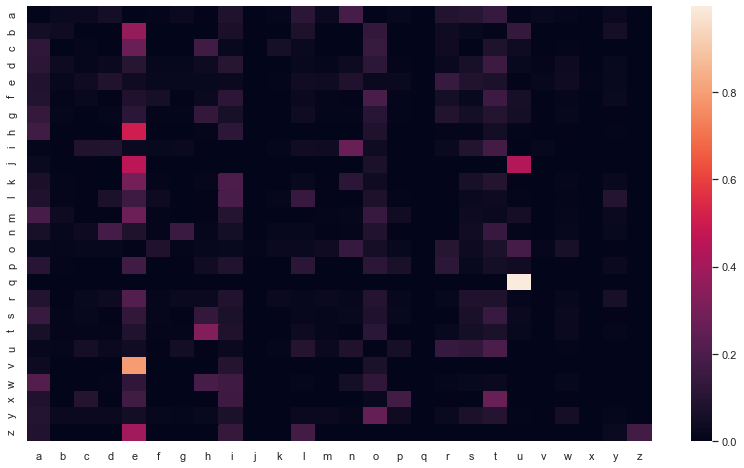

In [182]:
# —Å—Ç—Ä–æ–∏–º —Ç–µ–ø–ª–æ–≤—É—é –∫–∞—Ä—Ç—É. –í—ã—Å–æ–∫–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ –¥–ª—è –ø–æ—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å–Ω–æ—Å—Ç–∏ 
#"qu". 
plt.figure(figsize=(14,8))
sns.heatmap(df)
plt.show()

In [183]:

# –ü–æ—Å—á–∏—Ç–∞–µ–º –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å –Ω–∞—á–∞–ª—å–Ω–æ–≥–æ —Å–æ—Å—Ç–æ—è–Ω–∏—è —Ü–µ–ø–∏ –¥–ª—è –±—É–∫–≤ –∞–Ω–≥–ª –∞–ª—Ñ–∞–≤–∏—Ç–∞

In [189]:

# –ø–æ—Å—á–∏—Ç–∞–µ–º —á–∏—Å–ª–æ —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö —Å–ª–æ–≤
len(set(text.split(' ')))

6964

In [191]:
# –≥—Ä—É–±–æ –ø—Ä–∏–∫–∏–Ω–µ–º –¥–ª—è –∫–∞–∂–¥–æ–π –±—É–∫–≤—ã –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å —Ç–æ–≥–æ, —á—Ç–æ —Å –Ω–µ–µ –Ω–∞—á–∏–Ω–∞–µ—Ç—Å—è —Å–ª—É—á–∞–π–Ω–æ–µ —Å–ª–æ–≤–æ
unique_words = list(set(text.split(' ')))
unique_words[:10]

['',
 "angrily.\n\n'it",
 'it\nmakes',
 'breath."\n',
 'life.\n\nthe',
 'processions;',
 'foundation."\n\n-',
 'dormouse\nturned',
 'calling',
 'turtle\nangrily:']

In [193]:
# —É–¥–∞–ª–∏–º –ø–µ—Ä–≤—ã–π —ç–ª–µ–º–µ–Ω—Ç
del unique_words[0]

In [196]:

# –ø–æ—Å—á–∏—Ç–∞–µ–º, —Å–∫–æ–ª—å–∫–æ —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö —Å–ª–æ–≤ –Ω–∞—á–∏–Ω–∞–µ—Ç—Å—è –Ω–∞ –∫–∞–∂–¥—É—é –±—É–∫–≤—É
count_dict = {i:len(list(filter(lambda word: word[0] == i, unique_words))) for i in ENGLISH}
count_dict

{'a': 510,
 'b': 279,
 'c': 434,
 'd': 349,
 'e': 218,
 'f': 309,
 'g': 204,
 'h': 366,
 'i': 259,
 'j': 39,
 'k': 93,
 'l': 262,
 'm': 290,
 'n': 156,
 'o': 244,
 'p': 329,
 'q': 56,
 'r': 252,
 's': 672,
 't': 670,
 'u': 92,
 'v': 70,
 'w': 372,
 'x': 3,
 'y': 82,
 'z': 2}

In [197]:
# –ú–æ–∂–Ω–æ –ø—Ä–æ–∞–Ω–∞–ª–∏–∑–∏—Ä–æ–≤–∞—Ç—å –∞–Ω–æ–º–∞–ª–∏–∏

In [198]:

# –ø—Ä–µ–æ–±—Ä–∞–∑—É–µ–º –∑–Ω–∞—á–µ–Ω–∏—è –≤ –º–∞—Å—Å–∏–≤
prob_array =  np.array(list(count_dict.values()))
prob_array

array([510, 279, 434, 349, 218, 309, 204, 366, 259,  39,  93, 262, 290,
       156, 244, 329,  56, 252, 672, 670,  92,  70, 372,   3,  82,   2])

In [199]:
# —á—Ç–æ–±—ã –ø–æ—Å—á–∏—Ç–∞—Ç—å –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç–∏
prob_array = prob_array / np.sum(prob_array)

In [201]:

prob_array

array([0.077, 0.042, 0.066, 0.053, 0.033, 0.047, 0.031, 0.055, 0.039,
       0.006, 0.014, 0.04 , 0.044, 0.024, 0.037, 0.05 , 0.008, 0.038,
       0.102, 0.101, 0.014, 0.011, 0.056, 0.   , 0.012, 0.   ])

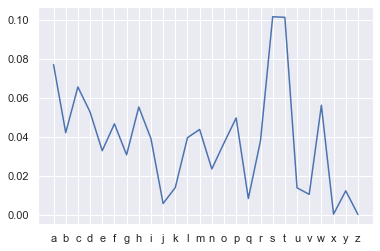

In [203]:

#–ë—É–∫–≤–∞ S - —á–µ–º–ø–∏–æ–Ω, —Å –Ω–µ–µ –Ω–∞—á–∏–Ω–∞–µ—Ç—Å—è –±–æ–ª—å—à–µ –≤—Å–µ–≥–æ —Å–ª–æ–≤ (11% —Å–ª—É—á–∞–µ–≤)
x = [x for x in ENGLISH]
y = prob_array
plt.plot(x,y)

–¢–µ–ø–µ—Ä—å –≤–æ–ø—Ä–æ—Å: –¥–æ–ø—É—Å—Ç–∏–º, —á—Ç–æ —É –Ω–∞—Å –µ—Å—Ç—å –∫–∞–∫–∞—è-—Ç–æ —Ç—Ä–∞–µ–∫—Ç–æ—Ä–∏—è (–ø–æ—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å–Ω–æ—Å—Ç—å —Å–æ—Å—Ç–æ—è–Ω–∏–π). –ö–∞–∫–æ–≤–∞ –µ—ë –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å? –û—Ç–≤–µ—Ç –Ω–∞ —ç—Ç–æ—Ç –≤–æ–ø—Ä–æ—Å –¥–∞–µ—Ç —Ç–µ–æ—Ä–µ–º–∞.

**–¢–µ–æ—Ä–µ–º–∞ –æ —Å–æ—Å—Ç–æ—è–Ω–∏—è—Ö –º–∞—Ä–∫–æ–≤—Å–∫–æ–π —Ü–µ–ø–∏**

–î–ª—è –ª—é–±–æ–≥–æ –Ω–∞—Ç—É—Ä–∞–ª—å–Ω–æ–≥–æ $n$ –∏ –ª—é–±—ã—Ö $i_0,i_1,‚Ä¶,i_{n‚àí1},i,j$

$P(X_0=i_0,X_1=i_1,‚Ä¶,X_n=i_n)=Œ±_{i_0}p_{i_0i_1}‚Ä¶p{i_{n‚àí1}i_n}.$

–ü—Ä–∏–º–µ—Ä: –ü—É—Å—Ç—å –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å –Ω–∞—á–∞–ª—å–Ω–æ–≥–æ —Å–æ—Å—Ç–æ—è–Ω–∏—è —Ü–µ–ø–∏ –¥–ª—è –±—É–∫–≤ –∞–Ω–≥–ª–∏–π—Å–∫–æ–≥–æ –∞–ª—Ñ–∞–≤–∏—Ç–∞ —Ä–∞–≤–Ω–∞ $\dfrac{1}{26}$.
–ß–µ–º—É —Ä–∞–≤–Ω–∞ –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å –Ω–∞–±–ª—é–¥–∞—Ç—å —Å—Ç—Ä–æ–∫—É "hello"?

In [208]:
string = "hello"
proba = 1.0 / 26
for cp, cn in zip(string[1:], string[:-1]):
    proba *= probabilities[POS[cp], POS[cn]]
print(proba)

5.348363016330027e-07


**–°–ª–µ–¥—Å—Ç–≤–∏–µ.** –î–ª—è –ª—é–±–æ–≥–æ –Ω–∞—Ç—É—Ä–∞–ª—å–Ω–æ–≥–æ $n$ –∏ –ª—é–±–æ–≥–æ $i_n \in E$

$P(X_n=i_n) = \sum \limits_{i_0,‚Ä¶,i_{n‚àí1} \in E} \alpha i_0p_{i_0i_1}‚Ä¶p_{i_{n‚àí1}i_n}$.

–ù–æ –æ–±—ã—á–Ω–æ –Ω–∞—Å –Ω–µ –∏–Ω—Ç–µ—Ä–µ—Å—É–µ—Ç –ø–æ–ª–Ω—ã–π –ø—É—Ç—å, –∞ –ª–∏—à—å –Ω–∞—á–∞–ª–æ –∏ –∫–æ–Ω–µ—Ü. –ü–æ—ç—Ç–æ–º—É –≤–≤–æ–¥—è—Ç –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å –ø–µ—Ä–µ–π—Ç–∏ –∏–∑ —Å–æ—Å—Ç–æ—è–Ω–∏—è $i$ –≤ —Å–æ—Å—Ç–æ—è–Ω–∏–µ $j$ –∑–∞ $n$ —à–∞–≥–æ–≤:

$p_{ij}^{(n)}=P(X_n=j|X_0=i)$

–ß–µ–º—É —Ä–∞–≤–Ω–∞ —ç—Ç–∞ –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å?

$P(X_n=j|X_0=i)=\dfrac{P(X_n=j,X_0=i)}{P(X_0=i)}=\sum \limits_{i_0,‚Ä¶,i_{n‚àí1} \in E} \dfrac{P(X_0=i, X_1=i_1,...,X_{n-1}=i_{n-1}, X_n = j)}{P(X_0=i)}=\sum \limits_{i_0,‚Ä¶,i_{n‚àí1} \in E} p_{ii_1}...p_{i_{n-1}j}$

–ï—Å–ª–∏ –º—ã –ø–æ—Å–º–æ—Ç—Ä–∏–º –Ω–∞ —Å–ª—É—á–∞–π $n=2$, —Ç–æ –ø–æ–ª—É—á–µ–Ω–Ω–æ–µ –≤—ã—Ä–∞–∂–µ–Ω–∏–µ –æ—á–µ–Ω—å –ø–æ—Ö–æ–∂–µ –Ω–∞ —Å–∫–∞–ª—è—Ä–Ω–æ–µ –ø—Ä–æ–∏–∑–≤–µ–¥–µ–Ω–∏–µ —Å—Ç—Ä–æ–∫ –º–∞—Ç—Ä–∏—Ü—ã –ø–µ—Ä–µ—Ö–æ–¥–Ω–æ–π –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç–∏. –û–∫–∞–∑—ã–≤–∞–µ—Ç—Å—è, —á—Ç–æ —ç—Ç–æ –Ω–µ —Ç–∞–∫ —É–∂ –∏ –¥–∞–ª–µ–∫–æ –æ—Ç –∏—Å—Ç–∏–Ω—ã.

**–¢–µ–æ—Ä–µ–º–∞.** –ü—É—Å—Ç—å $P^{(n)}=(p_{ij}^{(n)}) i,j \in E$. –¢–æ–≥–¥–∞ $P^{(n)}=P‚ãÖP‚ãÖ‚Ä¶‚ãÖP=P^n$

**–í–æ–ø—Ä–æ—Å:** –∫–∞–∫ –ø–æ–¥—Å—á–∏—Ç–∞—Ç—å –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å, —á—Ç–æ —Å–ª–æ–≤–æ –∏–∑ 3 –±—É–∫–≤ –Ω–∞—á–∏–Ω–∞–µ—Ç—Å—è –Ω–∞ –±—É–∫–≤—É "h" –∏ –∑–∞–∫–∞–Ω—á–∏–≤–∞–µ—Ç—Å—è –Ω–∞ –±—É–∫–≤—É "y"?

In [210]:
start = POS['h']
end = POS['y']
prior = 1. / len(ENGLISH)
for c in ENGLISH:
    proba = prior * probabilities[start, POS[c]] * probabilities[POS[c], end]
    if proba > 0:
        print(''.join(['h', c, 'y']), proba)

hay 0.00019786241179454465
hby 3.2498131357446937e-06
hcy 2.5963886570530186e-07
hdy 2.00246712505073e-06
hey 0.00041670464060019366
hfy 2.4496387427496224e-06
hgy 2.202234105234601e-07
hhy 3.0694052582470812e-06
hky 1.0202901705244971e-07
hly 6.987940162352581e-06
hmy 4.054691865351508e-06
hny 1.0187698076726042e-06
hoy 2.0758961455728112e-05
hpy 2.095534994542692e-06
hry 2.9097918521227684e-05
hsy 2.6301624264116166e-06
hty 2.5534949950507328e-05
huy 2.3160432980985944e-07
hvy 3.0372085380791536e-08
hwy 6.90255025783172e-07
hyy 4.816238159185105e-06


–≠—Ç–æ —Ä–∞–±–æ—Ç–∞–µ—Ç –Ω–µ –≤—Å–µ–≥–¥–∞. –ü–æ—á–µ–º—É –∂–µ? –ü–æ—Ç–æ–º—É —á—Ç–æ –Ω–∏–∫—Ç–æ –Ω–µ –æ–±–µ—â–∞–ª, —á—Ç–æ –ø–µ—Ä–µ—Ö–æ–¥–Ω–∞—è –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å –Ω–µ –∑–∞–≤–∏—Å–∏—Ç –æ—Ç —à–∞–≥–∞. –ï—Å–ª–∏ –æ–Ω–∞ –¥–µ–π—Å—Ç–≤–∏—Ç–µ–ª—å–Ω–æ –Ω–µ –∑–∞–≤–∏—Å–∏—Ç, —Ç–æ –≥–æ–≤–æ—Ä—è—Ç, —á—Ç–æ –º–∞—Ä–∫–æ–≤—Å–∫–∞—è —Ü–µ–ø—å –æ–¥–Ω–æ—Ä–æ–¥–Ω–∞.

# –ì–µ–Ω–µ—Ä–∏—Ä–æ–≤–∞–Ω–∏–µ –≤—ã–±–æ—Ä–æ–∫ –∏–∑ –º–∞—Ä–∫–æ–≤—Å–∫–æ–π —Ü–µ–ø–∏

–ö–∞–∫ —Å–æ–∑–¥–∞—Ç—å —Ä–µ–∞–ª–∏–∑–∞—Ü–∏—é –¥–ª–∏–Ω—ã $N$ –∏–∑ –º–∞—Ä–∫–æ–≤—Å–∫–æ–π —Ü–µ–ø–∏?
–°–≥–µ–Ω–µ—Ä–∏—Ä–æ–≤–∞—Ç—å –Ω–∞—á–∞–ª—å–Ω–æ–µ —Å–æ—Å—Ç–æ—è–Ω–∏–µ —Å–æ–≥–ª–∞—Å–Ω–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—é $\alpha_i‚â°P(X_0=i)$, –ø–æ–ª–æ–∂–∏—Ç—å $n \leftarrow 0$.
–ü–æ–∫–∞ $n<N$, –ø–æ–≤—Ç–æ—Ä—è—Ç—å:
- –ò–º–µ—è –∫–æ–Ω—Ç–µ–∫—Å—Ç $X_n$, —Å–≥–µ–Ω–µ—Ä–∏—Ä–æ–≤–∞—Ç—å —Å–æ—Å—Ç–æ—è–Ω–∏–µ $X_{n+1}$ –∏–∑ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è $P(X_{n+1}|X_n)$
- –ü–æ–ª–æ–∂–∏—Ç—å $n \leftarrow n+1$

In [212]:
s = []
start = np.random.choice(list(ENGLISH))
s.append(start)
length = 10
for i in range(length):
    index = POS[s[i]]
    next_char = np.random.choice(list(ENGLISH), p=probabilities[index])
    s.append(next_char)

print (''.join(s))

medaprerske


# –ó–∞–¥–∞—á–∞ —Ä–∞–Ω–∂–∏—Ä–æ–≤–∞–Ω–∏—è

–¢–µ–º–∞, –ø—Ä–µ–¥—Å—Ç–∞–≤–ª—è—é—â–∞—è –∏–Ω—Ç–µ—Ä–µ—Å –¥–ª—è —ç–∫–æ–Ω–æ–º–∏–∫–∏ –∏ –º–Ω–æ–≥–∏—Ö –¥—Ä—É–≥–∏—Ö –¥–∏—Å—Ü–∏–ø–ª–∏–Ω - —Ä–µ–π—Ç–∏–Ω–≥, —Ä–∞–Ω–∂–∏—Ä–æ–≤–∞–Ω–∏–µ.



–†–µ–π—Ç–∏–Ω–≥, –ø—Ä–∏—Å–≤–æ–µ–Ω–Ω—ã–π –≤–µ–±-—Å—Ç—Ä–∞–Ω–∏—Ü–∞–º –ø–æ–∏—Å–∫–æ–≤—ã–º–∏ —Å–∏—Å—Ç–µ–º–∞–º–∏.
(–•–æ—Ç—è –ø—Ä–æ–±–ª–µ–º–∞ –º–æ—Ç–∏–≤–∏—Ä–æ–≤–∞–Ω–∞ –∏–∑–≤–Ω–µ —ç–∫–æ–Ω–æ–º–∏–∫–∏, –Ω–∞ —Å–∞–º–æ–º –¥–µ–ª–µ —Å—É—â–µ—Å—Ç–≤—É–µ—Ç —Ç–µ—Å–Ω–∞—è —Å–≤—è–∑—å –º–µ–∂–¥—É —Å–∏—Å—Ç–µ–º–∞–º–∏ —Ä–∞–Ω–∂–∏—Ä–æ–≤–∞–Ω–∏—è –ø–æ–∏—Å–∫–∞ –∏ —Ü–µ–Ω–∞–º–∏ –≤ –æ–ø—Ä–µ–¥–µ–ª–µ–Ω–Ω—ã—Ö –∫–æ–Ω–∫—É—Ä–µ–Ω—Ç–Ω—ã—Ö —Ä–∞–≤–Ω–æ–≤–µ—Å–∏—è—Ö - —Å–º. [[DLP13]] (https://python-programming.quantecon.org/zreferences. HTML # dlp2013))

–ß—Ç–æ–±—ã –ø–æ–Ω—è—Ç—å –ø—Ä–æ–±–ª–µ–º—É, —Ä–∞—Å—Å–º–æ—Ç—Ä–∏—Ç–µ –Ω–∞–±–æ—Ä —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤, –≤–æ–∑–≤—Ä–∞—â–∞–µ–º—ã—Ö –∑–∞–ø—Ä–æ—Å–æ–º –∫ –ø–æ–∏—Å–∫–æ–≤–æ–π —Å–∏—Å—Ç–µ–º–µ.

–î–ª—è –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—è –∂–µ–ª–∞—Ç–µ–ª—å–Ω–æ –ø–æ–ª—É—á–∏—Ç—å –±–æ–ª—å—à–æ–π –Ω–∞–±–æ—Ä —Ç–æ—á–Ω—ã—Ö —Å–æ–≤–ø–∞–¥–µ–Ω–∏–π
–≤–µ—Ä–Ω—É—Ç—å —Å–æ–≤–ø–∞–¥–µ–Ω–∏—è –ø–æ –ø–æ—Ä—è–¥–∫—É, –≥–¥–µ –ø–æ—Ä—è–¥–æ–∫ —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É–µ—Ç –Ω–µ–∫–æ—Ç–æ—Ä–æ–π –º–µ—Ä–µ ¬´–≤–∞–∂–Ω–æ—Å—Ç–∏¬ª.
–†–∞–Ω–∂–∏—Ä–æ–≤–∞–Ω–∏–µ –ø–æ —Å—Ç–µ–ø–µ–Ω–∏ –≤–∞–∂–Ω–æ—Å—Ç–∏ —è–≤–ª—è–µ—Ç—Å—è –ø—Ä–æ–±–ª–µ–º–æ–π, –∫–æ—Ç–æ—Ä—É—é –º—ã —Å–µ–π—á–∞—Å —Ä–∞—Å—Å–º–∞—Ç—Ä–∏–≤–∞–µ–º.

–ú–µ—Ç–æ–¥–æ–ª–æ–≥–∏—è, —Ä–∞–∑—Ä–∞–±–æ—Ç–∞–Ω–Ω–∞—è –¥–ª—è —Ä–µ—à–µ–Ω–∏—è —ç—Ç–æ–π –ø—Ä–æ–±–ª–µ–º—ã –æ—Å–Ω–æ–≤–∞—Ç–µ–ª—è–º–∏ Google –õ–∞—Ä—Ä–∏ –ü–µ–π–¥–∂–µ–º –∏ –°–µ—Ä–≥–µ–µ–º –ë—Ä–∏–Ω–æ–º –∏–∑–≤–µ—Å—Ç–µ–Ω –∫–∞–∫ [PageRank] (https://en.wikipedia.org/wiki/PageRank).

–ß—Ç–æ–±—ã –ø—Ä–æ–∏–ª–ª—é—Å—Ç—Ä–∏—Ä–æ–≤–∞—Ç—å –∏–¥–µ—é, —Ä–∞—Å—Å–º–æ—Ç—Ä–∏–º —Å–ª–µ–¥—É—é—â—É—é —Å—Ö–µ–º—É



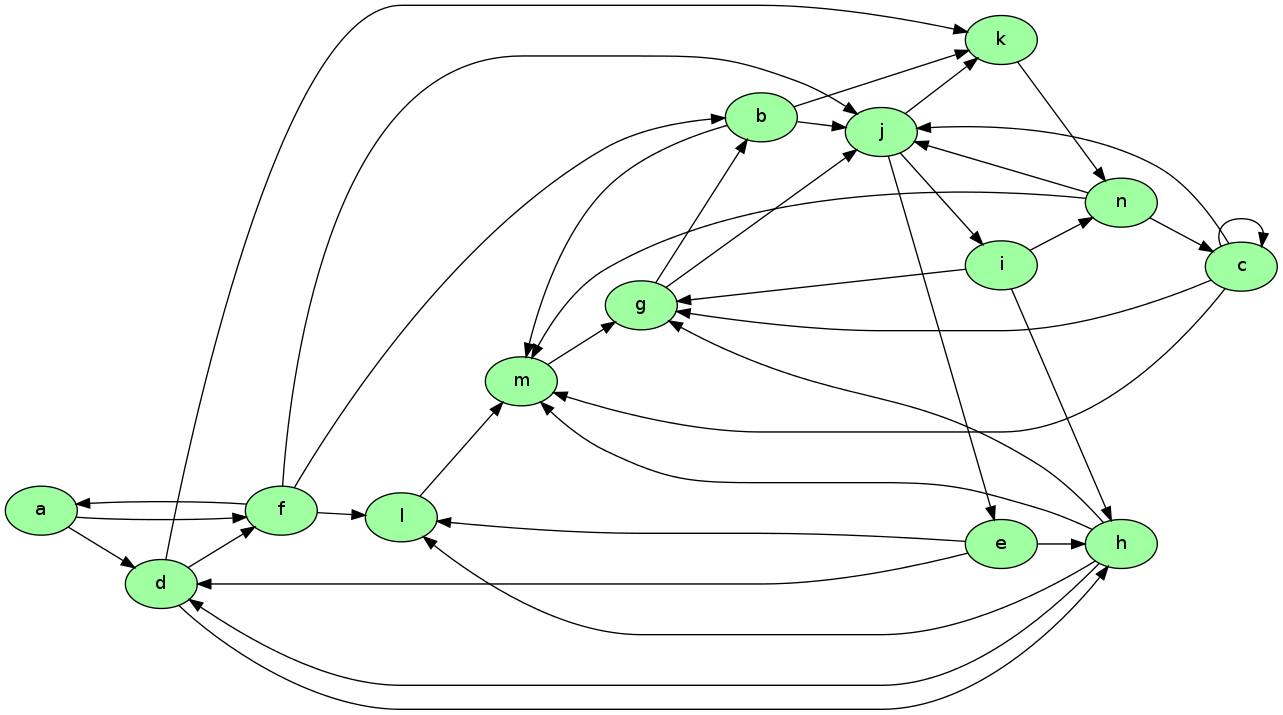

–ü—Ä–µ–¥—Å—Ç–∞–≤—å—Ç–µ, —á—Ç–æ —ç—Ç–æ –º–∏–Ω–∏–∞—Ç—é—Ä–Ω–∞—è –≤–µ—Ä—Å–∏—è WWW, —Å

- –∫–∞–∂–¥—ã–π —É–∑–µ–ª, –ø—Ä–µ–¥—Å—Ç–∞–≤–ª—è—é—â–∏–π –≤–µ–±-—Å—Ç—Ä–∞–Ω–∏—Ü—É
- –∫–∞–∂–¥–∞—è —Å—Ç—Ä–µ–ª–∫–∞, –ø—Ä–µ–¥—Å—Ç–∞–≤–ª—è—é—â–∞—è —Å—É—â–µ—Å—Ç–≤–æ–≤–∞–Ω–∏–µ —Å—Å—ã–ª–∫–∏ —Å –æ–¥–Ω–æ–π —Å—Ç—Ä–∞–Ω–∏—Ü—ã –Ω–∞ –¥—Ä—É–≥—É—é


–¢–µ–ø–µ—Ä—å –¥–∞–≤–∞–π—Ç–µ –ø–æ–¥—É–º–∞–µ–º –æ —Ç–æ–º, –∫–∞–∫–∏–µ —Å—Ç—Ä–∞–Ω–∏—Ü—ã –º–æ–≥—É—Ç –±—ã—Ç—å –≤–∞–∂–Ω—ã–º–∏ –≤ —Å–º—ã—Å–ª–µ —Ü–µ–Ω–Ω–æ—Å—Ç–∏ –¥–ª—è –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—è –ø–æ–∏—Å–∫–æ–≤–æ–π —Å–∏—Å—Ç–µ–º—ã.

–û–¥–Ω–∏–º –∏–∑ –≤–æ–∑–º–æ–∂–Ω—ã—Ö –∫—Ä–∏—Ç–µ—Ä–∏–µ–≤ –≤–∞–∂–Ω–æ—Å—Ç–∏ —Å—Ç—Ä–∞–Ω–∏—Ü—ã —è–≤–ª—è–µ—Ç—Å—è –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –≤—Ö–æ–¥—è—â–∏—Ö —Å—Å—ã–ª–æ–∫ - –ø–æ–∫–∞–∑–∞—Ç–µ–ª—å –ø–æ–ø—É–ª—è—Ä–Ω–æ—Å—Ç–∏.

–ü–æ —ç—Ç–æ–π –º–µ—Ä–µ `m` –∏` j` —è–≤–ª—è—é—Ç—Å—è –Ω–∞–∏–±–æ–ª–µ–µ –≤–∞–∂–Ω—ã–º–∏ —Å—Ç—Ä–∞–Ω–∏—Ü–∞–º–∏ —Å 5 –≤—Ö–æ–¥—è—â–∏–º–∏ —Å—Å—ã–ª–∫–∞–º–∏ –∫–∞–∂–¥–∞—è.

–û–¥–Ω–∞–∫–æ —á—Ç–æ –¥–µ–ª–∞—Ç—å, –µ—Å–ª–∏, —Å–∫–∞–∂–µ–º, —Å—Ç—Ä–∞–Ω–∏—Ü—ã, —Å—Å—ã–ª–∞—é—â–∏–µ—Å—è –Ω–∞ `m`, —Å–∞–º–∏ –ø–æ —Å–µ–±–µ –Ω–µ –≤–∞–∂–Ω—ã?


–ü–æ–¥—É–º–∞–≤ —Ç–∞–∫, –ø—Ä–µ–¥—Å—Ç–∞–≤–ª—è–µ—Ç—Å—è —Ü–µ–ª–µ—Å–æ–æ–±—Ä–∞–∑–Ω—ã–º –≤–∑–≤–µ—à–∏–≤–∞—Ç—å –≤—Ö–æ–¥—è—â–∏–µ —É–∑–ª—ã —Å –æ—Ç–Ω–æ—Å–∏—Ç–µ–ª—å–Ω–æ–π –≤–∞–∂–Ω–æ—Å—Ç—å—é.

–ê–ª–≥–æ—Ä–∏—Ç–º  PageRank –ø—Ä–∏–±–ª–∏–∑–∏—Ç–µ–ª—å–Ω–æ –≤—ã–ø–æ–ª–Ω—è–µ—Ç —Å–ª–µ–¥—É—é—â–∏–π –ø—Ä–æ—Ü–µ—Å—Å. –ú—ã —Å—á–∏—Ç–∞–µ–º, —á—Ç–æ –ø—Ä–æ–∏–∑–≤–æ–ª—å–Ω—ã–π –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—å –ò–Ω—Ç–µ—Ä–Ω–µ—Ç–∞ –≤ –∏—Å—Ö–æ–¥–Ω—ã–π –º–æ–º–µ–Ω—Ç –≤—Ä–µ–º–µ–Ω–∏ –Ω–∞—Ö–æ–¥–∏—Ç—Å—è –Ω–∞ –æ–¥–Ω–æ–π –∏–∑ —Å—Ç—Ä–∞–Ω–∏—Ü. –ó–∞—Ç–µ–º —ç—Ç–æ—Ç –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—å –Ω–∞—á–∏–Ω–∞–µ—Ç —Å–ª—É—á–∞–π–Ω—ã–º –æ–±—Ä–∞–∑–æ–º –Ω–∞—á–∏–Ω–∞–µ—Ç –ø–µ—Ä–µ–º–µ—â–∞—Ç—å—Å—è, —â—ë–ª–∫–∞—è –Ω–∞ –∫–∞–∂–¥–æ–π —Å—Ç—Ä–∞–Ω–∏—Ü–µ –ø–æ –æ–¥–Ω–æ–π –∏–∑ —Å—Å—ã–ª–æ–∫, –∫–æ—Ç–æ—Ä—ã–µ –≤–µ–¥—É—Ç –Ω–∞ –¥—Ä—É–≥—É—é —Å—Ç—Ä–∞–Ω–∏—Ü—É —Ä–∞—Å—Å–º–∞—Ç—Ä–∏–≤–∞–µ–º–æ–≥–æ –º–Ω–æ–∂–µ—Å—Ç–≤–∞ (–ø—Ä–µ–¥–ø–æ–ª–∞–≥–∞–µ—Ç—Å—è, —á—Ç–æ –≤—Å–µ —Å—Å—ã–ª–∫–∏, –≤–µ–¥—É—â–∏–µ –≤–Ω–µ —ç—Ç–∏—Ö —Å—Ç—Ä–∞–Ω–∏—Ü, –∑–∞–ø—Ä–µ—â–µ–Ω—ã). –ù–∞ –ª—é–±–æ–π —Å—Ç—Ä–∞–Ω–∏—Ü–µ –≤—Å–µ –¥–æ–ø—É—Å—Ç–∏–º—ã–µ —Å—Å—ã–ª–∫–∏ –∏–º–µ—é—Ç –æ–¥–∏–Ω–∞–∫–æ–≤—É—é –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å –Ω–∞–∂–∞—Ç–∏—è.

–¢–∞–∫ –º—ã –∑–∞–¥–∞—ë–º —Ü–µ–ø—å –ú–∞—Ä–∫–æ–≤–∞: —Å—Ç—Ä–∞–Ω–∏—Ü—ã ‚Äî —ç—Ç–æ –≤–æ–∑–º–æ–∂–Ω—ã–µ —Å–æ—Å—Ç–æ—è–Ω–∏—è, –ø–µ—Ä–µ—Ö–æ–¥–Ω—ã–µ –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç–∏ –∑–∞–¥–∞—é—Ç—Å—è —Å—Å—ã–ª–∫–∞–º–∏ —Å–æ —Å—Ç—Ä–∞–Ω–∏—Ü—ã –Ω–∞ —Å—Ç—Ä–∞–Ω–∏—Ü—É (–≤–∑–≤–µ—à–µ–Ω–Ω—ã–º–∏ —Ç–∞–∫–∏–º –æ–±—Ä–∞–∑–æ–º, —á—Ç–æ –Ω–∞ –∫–∞–∂–¥–æ–π —Å—Ç—Ä–∞–Ω–∏—Ü–µ –≤—Å–µ —Å–≤—è–∑–∞–Ω–Ω—ã–µ —Å—Ç—Ä–∞–Ω–∏—Ü—ã –∏–º–µ—é—Ç –æ–¥–∏–Ω–∞–∫–æ–≤—É—é –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å –≤—ã–±–æ—Ä–∞), –∞ —Å–≤–æ–π—Å—Ç–≤–∞ –æ—Ç—Å—É—Ç—Å—Ç–≤–∏—è –ø–∞–º—è—Ç–∏ —á—ë—Ç–∫–æ –æ–ø—Ä–µ–¥–µ–ª—è—é—Ç—Å—è –ø–æ–≤–µ–¥–µ–Ω–∏–µ–º –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—è. –ï—Å–ª–∏ —Ç–∞–∫–∂–µ –ø—Ä–µ–¥–ø–æ–ª–æ–∂–∏—Ç—å, —á—Ç–æ –∑–∞–¥–∞–Ω–Ω–∞—è —Ü–µ–ø—å –ø–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω–æ –≤–æ–∑–≤—Ä–∞—Ç–Ω–∞—è –∏ –∞–ø–µ—Ä–∏–æ–¥–∏—á–Ω–∞—è (–¥–ª—è —É–¥–æ–≤–ª–µ—Ç–≤–æ—Ä–µ–Ω–∏—è —ç—Ç–∏–º —Ç—Ä–µ–±–æ–≤–∞–Ω–∏—è–º –ø—Ä–∏–º–µ–Ω—è—é—Ç—Å—è –Ω–µ–±–æ–ª—å—à–∏–µ —Ö–∏—Ç—Ä–æ—Å—Ç–∏), —Ç–æ–≥–¥–∞ –≤ –¥–ª–∏—Ç–µ–ª—å–Ω–æ–π –ø–µ—Ä—Å–ø–µ–∫—Ç–∏–≤–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç–µ–π ¬´—Ç–µ–∫—É—â–µ–π —Å—Ç—Ä–∞–Ω–∏—Ü—ã¬ª —Å—Ö–æ–¥–∏—Ç—Å—è –∫ —Å—Ç–∞—Ü–∏–æ–Ω–∞—Ä–Ω–æ–º—É —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—é. –¢–æ –µ—Å—Ç—å –∫–∞–∫–æ–π –±—ã –Ω–∏ –±—ã–ª–∞ –Ω–∞—á–∞–ª—å–Ω–∞—è —Å—Ç—Ä–∞–Ω–∏—Ü–∞, —Å–ø—É—Å—Ç—è –¥–ª–∏—Ç–µ–ª—å–Ω–æ–µ –≤—Ä–µ–º—è –∫–∞–∂–¥–∞—è —Å—Ç—Ä–∞–Ω–∏—Ü–∞ –∏–º–µ–µ—Ç –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å (–ø–æ—á—Ç–∏ —Ñ–∏–∫—Å–∏—Ä–æ–≤–∞–Ω–Ω—É—é) —Å—Ç–∞—Ç—å —Ç–µ–∫—É—â–µ–π, –µ—Å–ª–∏ –º—ã –≤—ã–±–∏—Ä–∞–µ–º —Å–ª—É—á–∞–π–Ω—ã–π –º–æ–º–µ–Ω—Ç –≤—Ä–µ–º–µ–Ω–∏.

–ù–µ—Å–∫–æ–ª—å–∫–æ —É–ø—Ä–æ—â–µ–Ω–Ω–∞—è –ø—Ä–µ–∑–µ–Ω—Ç–∞—Ü–∏—è, –∫–æ—Ç–æ—Ä–∞—è –æ—Ç—Ä–∞–∂–∞–µ—Ç –æ—Å–Ω–æ–≤–Ω—É—é –∏–¥–µ—é, –∑–∞–∫–ª—é—á–∞–µ—Ç—Å—è –≤ —Å–ª–µ–¥—É—é—â–µ–º.



–û–±–æ–∑–Ω–∞—á–∞—è  ùëó  (—Ü–µ–ª–æ—á–∏—Å–ª–µ–Ω–Ω—ã–π –∏–Ω–¥–µ–∫—Å) —Ç–∏–ø–∏—á–Ω–æ–π —Å—Ç—Ä–∞–Ω–∏—Ü—ã, –∞  ùëüùëó  –µ–µ —Ä–µ–π—Ç–∏–Ω–≥, –º—ã —É—Å—Ç–∞–Ω–∞–≤–ª–∏–≤–∞–µ–º


$$
r_j = \sum_{i \in L_j} \frac{r_i}{\ell_i}
$$

–≥–¥–µ

- $ \ell_i $ –æ–±—â–µ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –∏—Å—Ö–æ–¥—è—â–∏—Ö —Å—Å—ã–ª–æ–∫ —Å $ i $  
- $ L_j $ —ç—Ç–æ –Ω–∞–±–æ—Ä –≤—Å–µ—Ö —Å—Ç—Ä–∞–Ω–∏—Ü $ i $ —Ç–∞–∫–∏—Ö —á—Ç–æ $ i $ –∏–º–µ–µ—Ç —Å—Å—ã–ª–∫—É –Ω–∞ $ j $  



–≠—Ç–æ –º–µ—Ä–∞ –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞ –≤—Ö–æ–¥—è—â–∏—Ö —Å—Å—ã–ª–æ–∫, –≤–∑–≤–µ—à–µ–Ω–Ω–∞—è –ø–æ –∏—Ö —Å–æ–±—Å—Ç–≤–µ–Ω–Ω–æ–º—É —Ä–µ–π—Ç–∏–Ω–≥—É (–∏ –Ω–æ—Ä–º–∞–ª–∏–∑–æ–≤–∞–Ω–Ω–∞—è –ø–æ $ 1 / \ell_i $).


–ï—Å—Ç—å, –æ–¥–Ω–∞–∫–æ, –¥—Ä—É–≥–∞—è –∏–Ω—Ç–µ—Ä–ø—Ä–µ—Ç–∞—Ü–∏—è, –∏ –æ–Ω–∞ –≤–æ–∑–≤—Ä–∞—â–∞–µ—Ç –Ω–∞—Å –∫ —Ü–µ–ø—è–º –ú–∞—Ä–∫–æ–≤–∞


–ü—É—Å—Ç—å  $ P $ –º–∞—Ä–∏—Ü–∞, –∑–∞–¥–∞–Ω–Ω–∞—è  $ P(i, j) = \mathbf 1\{i \to j\} / \ell_i $ –≥–¥–µ $ \mathbf 1\{i \to j\} = 1 $ –µ—Å–ª–∏ $ i $ –∏–º–µ–µ—Ç —Å—Å–ª—ã–∫—É –Ω–∞ $ j $ –∏ –Ω–æ–ª—å –≤ –ø—Ä–æ—Ç–∏–≤–Ω–æ–º —Å–ª—É—á–∞–µ.

–ú–∞—Ç—Ä–∏—Ü–∞ $ P $ 
—è–≤–ª—è–µ—Ç—Å—è —Å—Ç–æ—Ö–∞—Å—Ç–∏—á–µ—Å–∫–æ–π –º–∞—Ç—Ä–∏—Ü–µ–π –ø—Ä–∏ —É—Å–ª–æ–≤–∏–∏, —á—Ç–æ –∫–∞–∂–¥–∞—è —Å—Ç—Ä–∞–Ω–∏—Ü–∞ –∏–º–µ–µ—Ç —Ö–æ—Ç—è –±—ã –æ–¥–Ω—É —Å—Å—ã–ª–∫—É.

–° —ç—Ç–∏–º –æ–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ–º $ P $ –º—ã –∏–º–µ–µ–º
$$
r_j
= \sum_{i \in L_j} \frac{r_i}{\ell_i}
= \sum_{\text{all } i} \mathbf 1\{i \to j\} \frac{r_i}{\ell_i}
= \sum_{\text{all } i} P(i, j) r_i
$$



–ó–∞–ø–∏—Å—ã–≤–∞—è $ r $ –¥–ª—è –≤–µ–∫—Ç–æ—Ä–∞ —Å—Ç—Ä–æ–∫–∏ —Ä–∞–Ω–∂–∏—Ä–æ–≤–∞–Ω–∏—è, —ç—Ç–æ —Å—Ç–∞–Ω–æ–≤–∏—Ç—Å—è $ r = r P $.

–°–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å–Ω–æ $ r $ —è–≤–ª—è–µ—Ç—Å—è —Å—Ç–∞—Ü–∏–æ–Ω–∞—Ä–Ω—ã–º —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ–º —Å—Ç–æ—Ö–∞—Å—Ç–∏—á–µ—Å–∫–æ–π –º–∞—Ç—Ä–∏—Ü—ã $ P $.

–î–∞–≤–∞–π—Ç–µ –ø–æ–¥—É–º–∞–µ–º –æ  $ P(i, j) $ –∫–∞–∫ –æ –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç–∏ ¬´–ø–µ—Ä–µ—Ö–æ–¥–∞¬ª —Å–æ —Å—Ç—Ä–∞–Ω–∏—Ü—ã $ i $ –Ω–∞ —Å—Ç—Ä–∞–Ω–∏—Ü—É $ j $.

–ó–Ω–∞—á–µ–Ω–∏–µ $ P(i, j) $ –∏–º–µ–µ—Ç –∏–Ω—Ç–µ—Ä–ø—Ä–µ—Ç–∞—Ü–∏—é

- $ P(i, j) = 1/k $ –µ—Å–ª–∏ $ i $ –∏–º–µ–µ—Ç $ k $ –∏—Å—Ö–æ–¥—è—â–∏–µ —Å—Å—ã–ª–∫–∏ –∏ $ j $ –æ–¥–∏–Ω –∏–∑ –Ω–∏—Ö 
- $ P(i, j) = 0 $ –µ—Å–ª–∏ $ i $ –Ω–µ –∏–º–µ–µ—Ç –ø—Ä—è–º–æ–π —Å—Å—ã–ª–∫–∏ –Ω–∞ $ j $  


–¢–∞–∫–∏–º –æ–±—Ä–∞–∑–æ–º, –¥–≤–∏–∂–µ–Ω–∏–µ –æ—Ç —Å—Ç—Ä–∞–Ω–∏—Ü—ã –∫ —Å—Ç—Ä–∞–Ω–∏—Ü–µ - —ç—Ç–æ –¥–≤–∏–∂–µ–Ω–∏–µ –≤–µ–±-—Å–µ—Ä—Ñ–µ—Ä–∞, –∫–æ—Ç–æ—Ä—ã–π –ø–µ—Ä–µ–º–µ—â–∞–µ—Ç—Å—è —Å –æ–¥–Ω–æ–π —Å—Ç—Ä–∞–Ω–∏—Ü—ã –Ω–∞ –¥—Ä—É–≥—É—é –ø—É—Ç–µ–º —Å–ª—É—á–∞–π–Ω–æ–≥–æ –Ω–∞–∂–∞—Ç–∏—è –Ω–∞ –æ–¥–Ω—É –∏–∑ —Å—Å—ã–ª–æ–∫ –Ω–∞ —ç—Ç–æ–π —Å—Ç—Ä–∞–Ω–∏—Ü–µ.

–ó–¥–µ—Å—å ¬´—Å–ª—É—á–∞–π–Ω—ã–π¬ª –æ–∑–Ω–∞—á–∞–µ—Ç, —á—Ç–æ –∫–∞–∂–¥–∞—è —Å—Å—ã–ª–∫–∞ –≤—ã–±—Ä–∞–Ω–∞ —Å —Ä–∞–≤–Ω–æ–π –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å—é.

—Å—Ç–æ—Ä–∞–ø–Ω–∏—Ü $d$ —Ç–µ–º –≤–∞–∂–Ω–µ–µ,

—á–µ–º –±–æ–ª—å—à–µ –¥—Ä—É–≥–∏—Ö –¥–æ–∫—É–º–µ–Ω—Ç–æ–≤ $c$ —Å—Å—ã–ª–∞—é—Ç—Å—è –Ω–∞ $d$,
—á–µ–º –≤–∞–∂–Ω–µ–µ –¥–æ–∫—É–º–µ–Ω—Ç—ã $c$, —Å—Å—ã–ª–∞—é—â–∏–µ—Å—è –Ω–∞ $d$,
—á–µ–º –º–µ–Ω—å—à–µ –¥—Ä—É–≥–∏—Ö —Å—Å—ã–ª–æ–∫ –∏–º–µ—é—Ç —ç—Ç–∏ –¥–æ–∫—É–º–µ–Ω—Ç—ã $c$.


–ü–æ—Å–∫–æ–ª—å–∫—É $ r $ —è–≤–ª—è–µ—Ç—Å—è —Å—Ç–∞—Ü–∏–æ–Ω–∞—Ä–Ω—ã–º —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ–º $ P $, —Ä–µ–¥–ø–æ–ª–∞–≥–∞—è, —á—Ç–æ —É—Å–ª–æ–≤–∏–µ —Ä–∞–≤–Ω–æ–º–µ—Ä–Ω–æ–π —ç—Ä–≥–æ–¥–∏—á–Ω–æ—Å—Ç–∏ –≤—ã–ø–æ–ª–Ω–µ–Ω–æ, –º—ã  [–º–æ–∂–µ–º –∏–Ω—Ç–µ—Ä–ø—Ä–µ—Ç–∏—Ä–æ–≤–∞—Ç—å](#new-interp-sd) $ r_j $ –∫–∞–∫ –¥–æ–ª—é –≤—Ä–µ–º–µ–Ω–∏, –≤ —Ç–µ—á–µ–Ω–∏–µ –∫–æ—Ç–æ—Ä–æ–π (–æ—á–µ–Ω—å –ø–æ—Å—Ç–æ—è–Ω–Ω–æ–µ) —Å–ª—É—á–∞–π–Ω–æ–µ —Å–µ—Ä—Ñ–µ—Ä –ø—Ä–æ–≤–æ–¥–∏—Ç –Ω–∞ —Å—Ç—Ä–∞–Ω–∏—Ü–µ $ j $.

–í –æ—Å–Ω–æ–≤–µ PageRank –ª–µ–∂–∏—Ç —Ç–∞–∫–∞—è –≥–∏–ø–æ—Ç–µ–∑–∞: –Ω–∞–∏–±–æ–ª–µ–µ –≤–µ—Ä–æ—è—Ç–Ω—ã–µ —Å—Ç—Ä–∞–Ω–∏—Ü—ã –≤ —Å—Ç–∞—Ü–∏–æ–Ω–∞—Ä–Ω–æ–º —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–∏ –¥–æ–ª–∂–Ω—ã –±—ã—Ç—å —Ç–∞–∫–∂–µ –∏ —Å–∞–º—ã–º–∏ –≤–∞–∂–Ω—ã–º–∏ (–º—ã –ø–æ—Å–µ—â–∞–µ–º —ç—Ç–∏ —Å—Ç—Ä–∞–Ω–∏—Ü—ã —á–∞—Å—Ç–æ, –ø–æ—Ç–æ–º—É —á—Ç–æ –æ–Ω–∏ –ø–æ–ª—É—á–∞—é—Ç —Å—Å—ã–ª–∫–∏ —Å–æ —Å—Ç—Ä–∞–Ω–∏—Ü, –∫–æ—Ç–æ—Ä—ã–µ –≤ –ø—Ä–æ—Ü–µ—Å—Å–µ –ø–µ—Ä–µ—Ö–æ–¥–æ–≤ —Ç–æ–∂–µ —á–∞—Å—Ç–æ –ø–æ—Å–µ—â–∞—é—Ç—Å—è). –¢–æ–≥–¥–∞ —Å—Ç–∞—Ü–∏–æ–Ω–∞—Ä–Ω–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç–µ–π –æ–ø—Ä–µ–¥–µ–ª—è–µ—Ç –¥–ª—è –∫–∞–∂–¥–æ–≥–æ —Å–æ—Å—Ç–æ—è–Ω–∏—è –∑–Ω–∞—á–µ–Ω–∏–µ PageRank.

–û–¥–Ω–∞ –∏–∑ –æ—Ç–ª–∏—á–∏—Ç–µ–ª—å–Ω—ã—Ö –æ—Å–æ–±–µ–Ω–Ω–æ—Å—Ç–µ–π –∑–∞–¥–∞—á–∏ —Ä–∞–Ω–∂–∏—Ä–æ–≤–∞–Ω–∏—è –æ—Ç –∫–ª–∞—Å—Å–∏—á–µ—Å–∫–∏—Ö –∑–∞–¥–∞—á –º–∞—à–∏–Ω–Ω–æ–≥–æ –æ–±—É—á–µ–Ω–∏—è –∑–∞–∫–ª—é—á–∞–µ—Ç—Å—è –≤ —Ç–æ–º, —á—Ç–æ –∫–∞—á–µ—Å—Ç–≤–æ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–∞ –∑–∞–≤–∏—Å–∏—Ç –Ω–µ –æ—Ç –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω—ã—Ö –æ—Ü–µ–Ω–æ–∫ —Ä–µ–ª–µ–≤–∞–Ω—Ç–Ω–æ—Å—Ç–∏, –∞ –æ—Ç –ø–æ—Ä—è–¥–∫–∞ —Å–ª–µ–¥–æ–≤–∞–Ω–∏—è –¥–æ–∫—É–º–µ–Ω—Ç–æ–≤ –≤ —Ä–∞–º–∫–∞—Ö –∫–æ–Ω–∫—Ä–µ—Ç–Ω–æ–≥–æ –∑–∞–ø—Ä–æ—Å–∞, —Ç.–µ. –≤–∞–∂–Ω–æ –Ω–µ –∞–±—Å–æ–ª—é—Ç–Ω–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ —Ä–µ–ª–µ–≤–∞–Ω—Ç–Ω–æ—Å—Ç–∏ (–µ–≥–æ –¥–æ—Å—Ç–∞—Ç–æ—á–Ω–æ —Ç—Ä—É–¥–Ω–æ —Ñ–æ—Ä–º–∞–ª–∏–∑–æ–≤–∞—Ç—å –≤ –≤–∏–¥–µ —á–∏—Å–ª–∞), –∞ —Ç–æ, –±–æ–ª–µ–µ –∏–ª–∏ –º–µ–Ω–µ–µ —Ä–µ–ª–µ–≤–∞–Ω—Ç–µ–Ω –¥–æ–∫—É–º–µ–Ω—Ç, –æ—Ç–Ω–æ—Å–∏—Ç–µ–ª—å–Ω–æ –¥—Ä—É–≥–∏—Ö –¥–æ–∫—É–º–µ–Ω—Ç–æ–≤.



–ó–∞–¥–∞—á–∞ - –ø—Ä–∏–º–µ–Ω–∏—Ç—å —ç—Ç–æ—Ç –∞–ª–≥–æ—Ä–∏—Ç–º —Ä–∞–Ω–∂–∏—Ä–æ–≤–∞–Ω–∏—è –∫ –≥—Ä–∞—Ñ–∏–∫—É, –∏–∑–æ–±—Ä–∞–∂–µ–Ω–Ω–æ–º—É –≤—ã—à–µ.
–∏ –≤–µ—Ä–Ω—É—Ç—å —Å–ø–∏—Å–æ–∫ —Å—Ç—Ä–∞–Ω–∏—Ü, —É–ø–æ—Ä—è–¥–æ—á–µ–Ω–Ω—ã—Ö –ø–æ —Ä–∞–Ω–≥—É.

–í—Å–µ–≥–æ –∏–º–µ–µ—Ç—Å—è 14 —É–∑–ª–æ–≤ (—Ç–æ –µ—Å—Ç—å –≤–µ–±-—Å—Ç—Ä–∞–Ω–∏—Ü), –ø–µ—Ä–≤—ã–π –∏–∑ –∫–æ—Ç–æ—Ä—ã—Ö –Ω–∞–∑—ã–≤–∞–µ—Ç—Å—è `a`, –∞ –ø–æ—Å–ª–µ–¥–Ω–∏–π -` n`.

–¢–∏–ø–∏—á–Ω–∞—è —Å—Ç—Ä–æ–∫–∞ –∏–∑ —Ñ–∞–π–ª–∞ –∏–º–µ–µ—Ç –≤–∏–¥

```text
d -> h;
```

–≠—Ç–æ —Å–ª–µ–¥—É–µ—Ç –∏–Ω—Ç–µ—Ä–ø—Ä–µ—Ç–∏—Ä–æ–≤–∞—Ç—å –∫–∞–∫ –æ–∑–Ω–∞—á–∞—é—â–µ–µ, —á—Ç–æ —Å—É—â–µ—Å—Ç–≤—É–µ—Ç —Å—Å—ã–ª–∫–∞ –æ—Ç d –¥–æ h.

–î–∞–Ω–Ω—ã–µ –¥–ª—è —ç—Ç–æ–≥–æ –≥—Ä–∞—Ñ–∏–∫–∞ –ø–æ–∫–∞–∑–∞–Ω—ã –Ω–∏–∂–µ –∏ —Å—á–∏—Ç—ã–≤–∞—é—Ç—Å—è –≤ —Ñ–∞–π–ª —Å –∏–º–µ–Ω–µ–º web_graph_data.txt –ø—Ä–∏ –≤—ã–ø–æ–ª–Ω–µ–Ω–∏–∏ —è—á–µ–π–∫–∏.

In [64]:
%%file web_graph_data.txt
a -> d;
a -> f;
b -> j;
b -> k;
b -> m;
c -> c;
c -> g;
c -> j;
c -> m;
d -> f;
d -> h;
d -> k;
e -> d;
e -> h;
e -> l;
f -> a;
f -> b;
f -> j;
f -> l;
g -> b;
g -> j;
h -> d;
h -> g;
h -> l;
h -> m;
i -> g;
i -> h;
i -> n;
j -> e;
j -> i;
j -> k;
k -> n;
l -> m;
m -> g;
n -> c;
n -> j;
n -> m;

Overwriting web_graph_data.txt


–ú–µ—Ç–æ–¥ –¢–∞—É—á–µ–Ω–∞ 

–í –∫–∞—á–µ—Å—Ç–≤–µ –ø–µ—Ä–≤–æ–≥–æ —à–∞–≥–∞ –º—ã –≤—ã–±–∏—Ä–∞–µ–º

- $ n $, —á–∏—Å–ª–æ —Å–æ—Å—Ç–æ—è–Ω–∏–π –¥–ª—è –¥–∏—Å–∫—Ä–µ—Ç–Ω–æ–≥–æ –ø—Ä–∏–±–ª–∏–∂–µ–Ω–∏—è
- $ m $, —Ü–µ–ª–æ–µ —á–∏—Å–ª–æ, –∫–æ—Ç–æ—Ä–æ–µ –ø–∞—Ä–∞–º–µ—Ç—Ä–∏–∑—É–µ—Ç —à–∏—Ä–∏–Ω—É –ø—Ä–æ—Å—Ç—Ä–∞–Ω—Å—Ç–≤–∞ —Å–æ—Å—Ç–æ—è–Ω–∏–π


–ó–∞—Ç–µ–º –º—ã —Å–æ–∑–¥–∞–µ–º –ø—Ä–æ—Å—Ç—Ä–∞–Ω—Å—Ç–≤–æ —Å–æ—Å—Ç–æ—è–Ω–∏–π $ \{x_0, \ldots, x_{n-1}\} \subset \mathbb R $
–∏ —Å—Ç–æ—Ö–∞—Å—Ç–∏—á–µ—Å–∫—É—é $ n \times n $ –º–∞—Ç—Ä–∏—Ü—É $ P $ —Ç–∞–∫—É—é —á—Ç–æ

- $ x_0 = - m \, \sigma_y $  
- $ x_{n-1} = m \, \sigma_y $  
- $ x_{i+1} = x_i + s $,

–≥–¥–µ $ s = (x_{n-1} - x_0) / (n - 1) $  


–ü—É—Å—Ç—å $ F $ –∫—É–º—É–ª—è—Ç–∏–≤–Ω–∞—è —Ñ—É–Ω–∫—Ü–∏—è —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –Ω–æ—Ä–º–∞–ª—å–Ω–æ–≥–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è $ N(0, \sigma_u^2) $.

–ó–Ω–∞—á–µ–Ω–∏—è $ P(x_i, x_j) $ –≤—ã—á–∏—Å–ª—è—é—Ç—Å—è –¥–ª—è –∞–ø–ø—Ä–æ–∫—Å–∏–º–∞—Ü–∏–∏ –ø—Ä–æ—Ü–µ—Å—Å–∞ AR (1) - –±–µ–∑ –¥–µ—Ä–∏–≤–∞—Ü–∏–∏ –ø—Ä–∞–≤–∏–ª–∞ —Å–ª–µ–¥—É—é—â–∏–µ:

1. –ï—Å–ª–∏ $ j = 0 $, —Ç–æ


$$
P(x_i, x_j) = P(x_i, x_0) = F(x_0-\rho x_i + s/2)
$$

1. –ï—Å–ª–∏ $ j = n-1 $, —Ç–æ 


$$
P(x_i, x_j) = P(x_i, x_{n-1}) = 1 - F(x_{n-1} - \rho x_i - s/2)
$$

1. –í –ø—Ä–æ—Ç–∏–≤–Ω–æ–º —Å–ª—É—á–∞–µ 


$$
P(x_i, x_j) = F(x_j - \rho x_i + s/2) - F(x_j - \rho x_i - s/2)
$$


–£–ø—Ä–∞–∂–Ω–µ–Ω–∏–µ –∑–∞–∫–ª—é—á–∞–µ—Ç—Å—è –≤ –Ω–∞–ø–∏—Å–∞–Ω–∏–∏ —Ñ—É–Ω–∫—Ü–∏–∏ `approx_markov(rho, sigma_u, m=3, n=7)` –∫–æ—Ç–æ—Ä–∞—è –≤–æ–∑–≤—Ä–∞—â–∞–µ—Ç
$ \{x_0, \ldots, x_{n-1}\} \subset \mathbb R $ –∏ $ n \times n $ –º–∞—Ç—Ä–∏—Ü—É
$ P $  –∫–∞–∫ –æ–ø–∏—Å–∞–Ω–æ –≤—ã—à–µ.


In [79]:

import numpy as np
from operator import itemgetter         

infile = 'web_graph_data.txt'              # –≤–≤–æ–¥ —Ñ–∞–π–ª–∞ –¥–∞–Ω–Ω—ã—Ö
alphabet = 'abcdefghijklmnopqrstuvwxyz'    # 

n = 14
Q = np.zeros((n, n), dtype=int)            # –≤–µ—Ä–Ω—É—Ç—å –Ω–æ–≤—ã–π –º–∞—Å—Å–∏–≤ –∑–∞–¥–∞–Ω–Ω–æ–π —Ñ–æ—Ä–º—ã –∏ —Ç–∏–ø–∞, –∑–∞–ø–æ–ª–Ω–µ–Ω–Ω—ã–π –Ω—É–ª—è–º–∏ (–º–∞—Ç—Ä–∏—Ü–∞ n –Ω–∞ n)
f = open(infile, 'r')                      
edges = f.readlines()                      # –≤–æ–∑–≤—Ä–∞—â–∞–µ—Ç —Å–ø–∏—Å–æ–∫, —Å–æ–¥–µ—Ä–∂–∞—â–∏–π —Å—Ç—Ä–æ–∫–∏ —Ñ–∞–π–ª–∞;
f.close()                                  
for edge in edges:                          
    from_node, to_node = re.findall('\w', edge)    # –ø–µ—Ä–µ–±—Ä–∞—Ç—å —Å—Ç—Ä–æ–∫–∏ —Ñ–∞–π–ª–∞: –≤–µ—Ä–Ω—É—Ç—å —Å–ø–∏—Å–æ–∫ –≤—Å–µ—Ö —Å–æ–≤–ø–∞–¥–µ–Ω–∏–π –∑–∞ –æ–¥–∏–Ω —à–∞–≥
    i, j = alphabet.index(from_node), alphabet.index(to_node)
    Q[i, j] = 1
P = np.empty((n, n))                      # –≤–µ—Ä–Ω—É—Ç—å –Ω–æ–≤—ã–π –º–∞—Å—Å–∏–≤ –∑–∞–¥–∞–Ω–Ω–æ–π —Ñ–æ—Ä–º—ã –∏ —Ç–∏–ø–∞, –±–µ–∑ –∏–Ω–∏—Ü–∏–∞–ª–∏–∑–∞—Ü–∏–∏ –∑–∞–ø–∏—Å–µ–π
for i in range(n):
    P[i, :] = Q[i, :] / Q[i, :].sum()     # –ü–æ—Å—Ç—Ä–æ–∏—Ç—å P (i, j)
mc = qe.MarkovChain(P)
r = mc.stationary_distributions[0]
ranked_pages = {alphabet[i] : r[i] for i in range(n)}

print('Rankings\n ***')                   # —Å–æ—Ä—Ç–∏—Ä—É–µ–º –ø–æ–ª—É—á–µ–Ω–Ω—ã–π —Å–ø–∏—Å–æ–∫
for name, rank in sorted(ranked_pages.items(), key=itemgetter(1), reverse=1):
    print (f'{name}: {rank:.4}')

Rankings
 ***
g: 0.1607
j: 0.1594
m: 0.1195
n: 0.1088
k: 0.09106
b: 0.08326
e: 0.05312
i: 0.05312
c: 0.04834
h: 0.0456
l: 0.03202
d: 0.03056
f: 0.01164
a: 0.002911


–ó–∞–¥–∞—á–∞ 1:
–î–ª—è —Ä—É—Å—Å–∫–æ–π –≤–µ—Ä—Å–∏–∏ –∫–Ω–∏–≥–∏ –ê–ª–∏—Å–∞ –≤ —Å—Ç—Ä–∞–Ω–µ —á—É–¥–µ—Å –ø–æ—Å—Ç—Ä–æ–π—Ç–µ –º–∞—Ç—Ä–∏—Ü—É –ø–µ—Ä–µ—Ö–æ–¥–Ω—ã—Ö –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç–µ–π. –ü–æ—Å—á–∏—Ç–∞–π—Ç–µ –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å –≤—Å—Ç—Ä–µ—Ç–∏—Ç—å —Å—Ç—Ä–æ–∫—É –∏–∑ 4-—Ö —Å–∏–º–≤–æ–ª–æ–≤, –∫–æ—Ç–æ—Ä–∞—è –Ω–∞—á–∏–Ω–∞–µ—Ç—Å—è –ø, –∞ –∫–æ–Ω—á–∞–µ—Ç—Å—è –Ω–∞ —Ä; –ò—Å–ø–æ–ª—å–∑—É—è –º–∞—Ç—Ä–∏—Ü—É –ø–µ—Ä–µ—Ö–æ–¥–Ω—ã—Ö –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç–µ–π —Å–≥–µ–Ω–µ—Ä–∏—Ä—É–π—Ç–µ —Å–ª–æ–≤–æ, –Ω–∞—á–∏–Ω–∞—é—â–µ–µ—Å—è —Å –±—É–∫–≤—ã "–ë" –∏ –∏–º–µ—é—â–µ–µ –¥–ª–∏–Ω—É 8-–º—å —Å–∏–º–≤–æ–ª–æ–≤

–ó–∞–¥–∞—á–∞ 2: –ø—Ä–æ—Ä–∞–Ω–∂–∏—Ä–æ–≤–∞—Ç—å —Å—Ç—Ä–∞–Ω–∏—Ü—ã —Å–∞–π—Ç–∞
    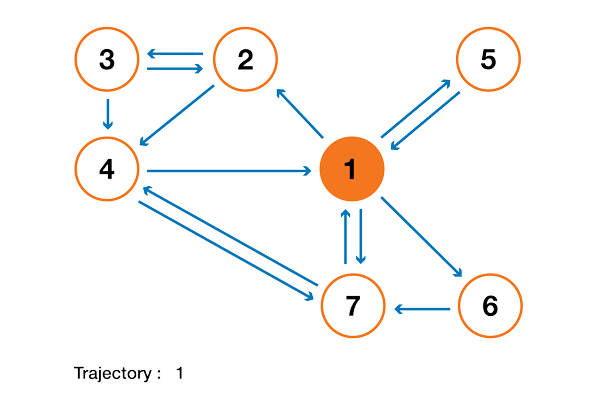

–ü–æ–æ–≤–µ—Ä–∫–∞: 1 > 7 > 4 > 2 > 5 = 6 > 3.